# Air Quality and Thomas Fire Visualization in Santa Barbara

Author: Fletcher McConnell

Repository: https://github.com/fletcher-m/eds220-hwk4-task3

## About

In this notebook, I create a line plot showing the AQI for Santa Barbara in 2017-2018. I also create a false color image of Santa Barbara with the Thomas Fire burn area overlayed.

## Highlights

- Data wrangling and exploration with pandas
- Geospatial data wrangling with geopandas
- Merging of tabular and vector data
- Creating and customizing a line plot
- Creating and customizing a false color image

## About the Data

In this notebook I use 

## Final Output

The final visualization for the AQI in Santa Barbara over 2017-2018:

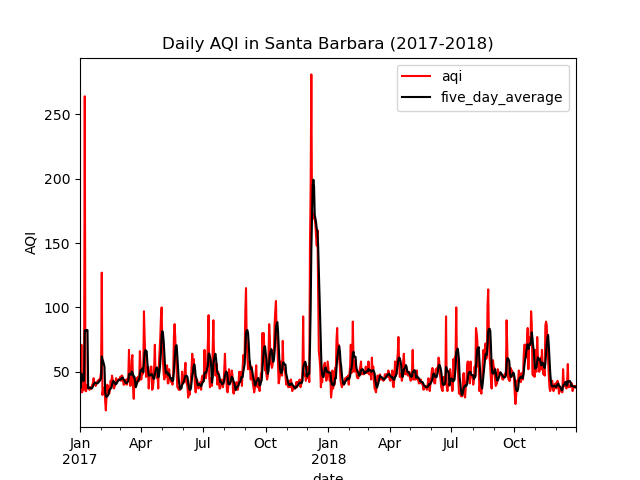




# Import Libraries

In [2]:
# Import pandas with standard abbr.
import pandas as pd

# Import Data

In [2]:
# Read in data for aqi_2017
aqi_17 = pd.read_csv("https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip")
# Read in data for aqi_2018
aqi_18 = pd.read_csv("https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip")

# Explore Data

In [2]:
# Look at first 5 lines of aqi_17 data frame
aqi_17.head()

# Look at first 5 lines of aqi_18 data frame
aqi_18.head()

# Look at the number of rows and columns in both data frames
aqi_17.shape
aqi_18.shape

# Look at the types of data in each column of the data frames
aqi_17.dtypes
aqi_18.dtypes

NameError: name 'plt' is not defined

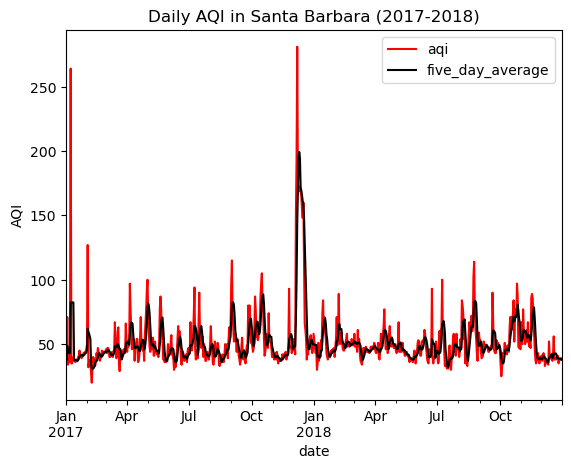

In [2]:
# combine both data frames 
aqi = pd.concat([aqi_17, aqi_18])
# view combined data frame
aqi

# initial column names: notice caps and spaces (difficult to work with!)

# re-assign the column names - .str.lower() makes them lower case
aqi.columns = aqi.columns.str.lower()

#  re-assign the column names again - .str.replace(' ','_') replaces the space for _
aqi.columns = aqi.columns.str.replace(' ','_')

# filter to only have data about Santa Barbara county
aqi_sb = aqi[aqi['county_name']=="Santa Barbara"]

# drop the the first 4 columns from aqi_sb
aqi_sb = aqi_sb.drop(['state_name', 'county_name', 'state_code', 'county_code'], axis=1)

# List data types for each column
aqi_sb.dtypes

# update the 'date' column to a datetime object and override the 'date' column with the output
aqi_sb.date = pd.to_datetime(aqi_sb.date)

# set date column as index
aqi_sb = aqi_sb.set_index('date')

# check to make sure the index is the 'date' column --> The data type of the index is 'datetime64'
aqi_sb.index

# Calculate rolling mean (5 day window)
aqi_sb.aqi.rolling('5D').mean()

# add new column 'five_day_average' to aqi_sb data frame
aqi_sb['five_day_average'] = aqi_sb.aqi.rolling('5D').mean()



# assign line colors for 'aqi' and 'five_day_average' 
colors = {'aqi': 'red',
         'five_day_average': 'black'}

# make a line plot for 'aqi' and 'five_day_average' over time
aqi_sb[['aqi', 'five_day_average']].plot(title="Daily AQI in Santa Barbara (2017-2018)",
                                       color=colors,
                                        ylabel='AQI')